In [14]:
from ultralytics import YOLO
from pathlib import Path
from tqdm import tqdm
import torch
import cv2
import numpy as np
import matplotlib.pyplot as plt

from helpers.data_helpers import evaluate_dataset

# Load trained model (adjust path if needed)
weights_path = Path("/Users/alanpehz/Documents/Personal/True Computer Vision/FootballTracker/models/best.pt")
model = YOLO(weights_path)
print("Loaded trained model successfully")

# Paths
VAL_DIR = Path("/Users/alanpehz/Documents/Personal/True Computer Vision/FootballTracker/data/valid/images")
TEST_DIR = Path("/Users/alanpehz/Documents/Personal/True Computer Vision/FootballTracker/data/test/images")

# Class names from training
class_names = ['ball', 'goalkeeper', 'player', 'referee']
print("Classes:", class_names)


Loaded trained model successfully
Classes: ['ball', 'goalkeeper', 'player', 'referee']


Evaluating images: 100%|██████████| 38/38 [00:16<00:00,  2.29it/s]



📊 Results for images:
  ball: 37.14% detected (13/35)
  goalkeeper: 85.19% detected (23/27)
  player: 98.54% detected (743/754)
  referee: 95.51% detected (85/89)

🎯 Found 14 images with detected balls. Showing up to 3 examples:


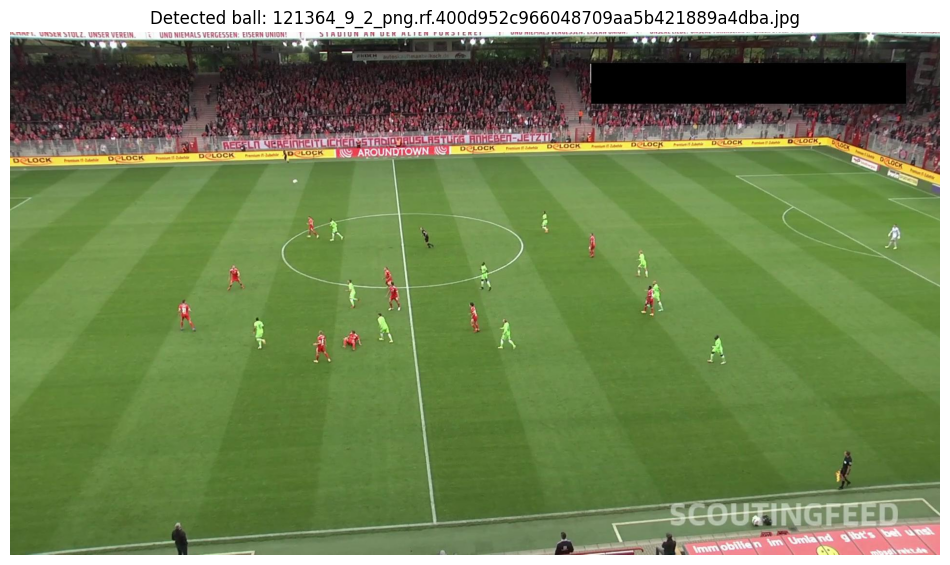

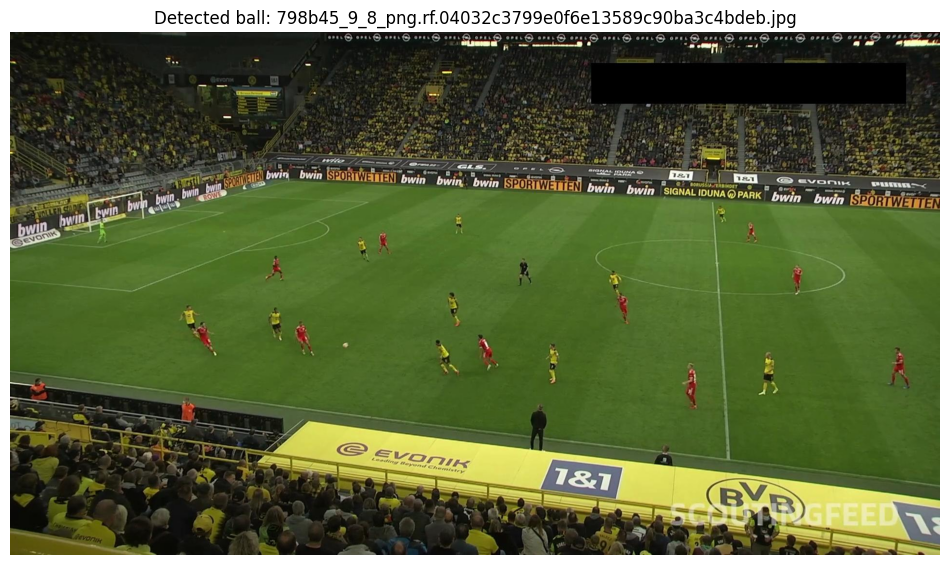

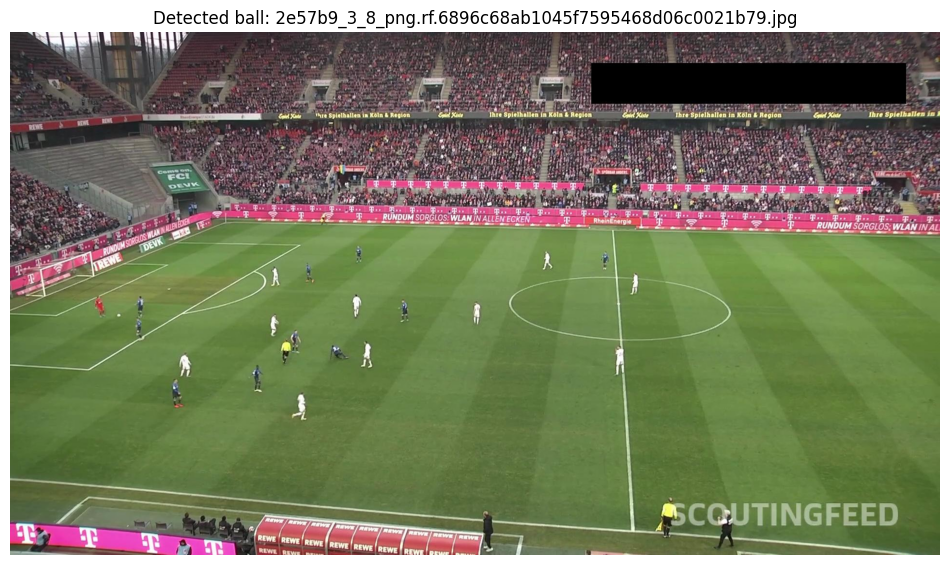

Evaluating images: 100%|██████████| 13/13 [00:06<00:00,  2.15it/s]



📊 Results for images:
  ball: 36.36% detected (4/11)
  goalkeeper: 90.91% detected (10/11)
  player: 98.07% detected (254/259)
  referee: 93.10% detected (27/29)

🎯 Found 5 images with detected balls. Showing up to 3 examples:


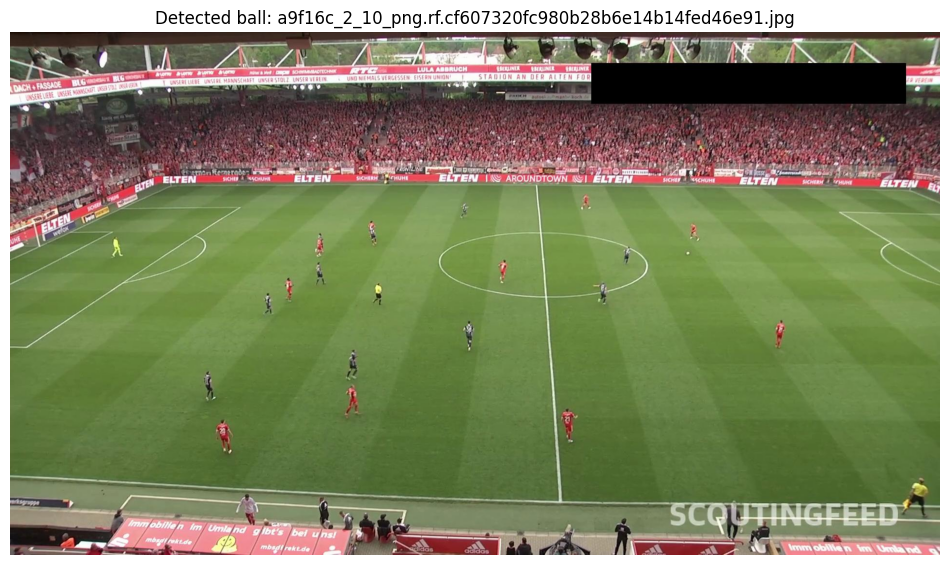

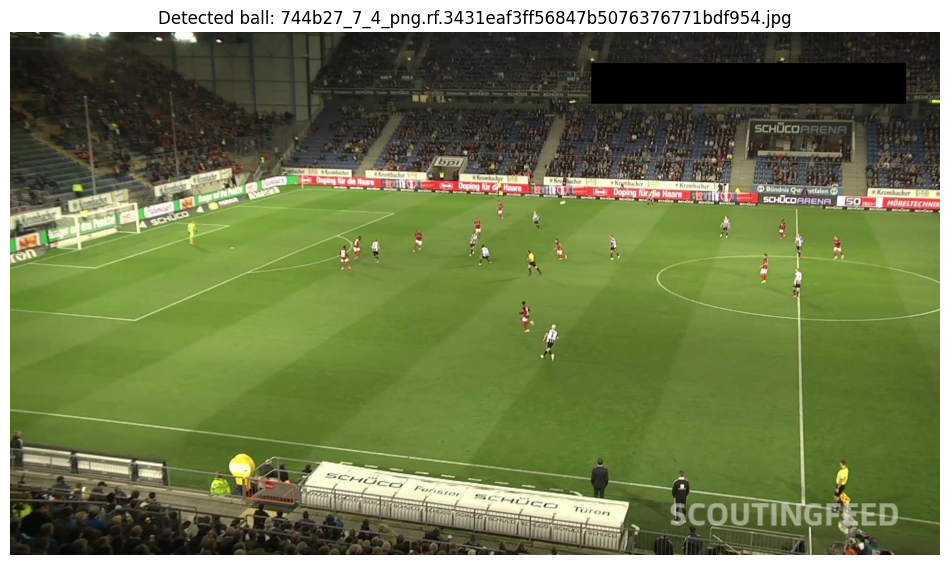

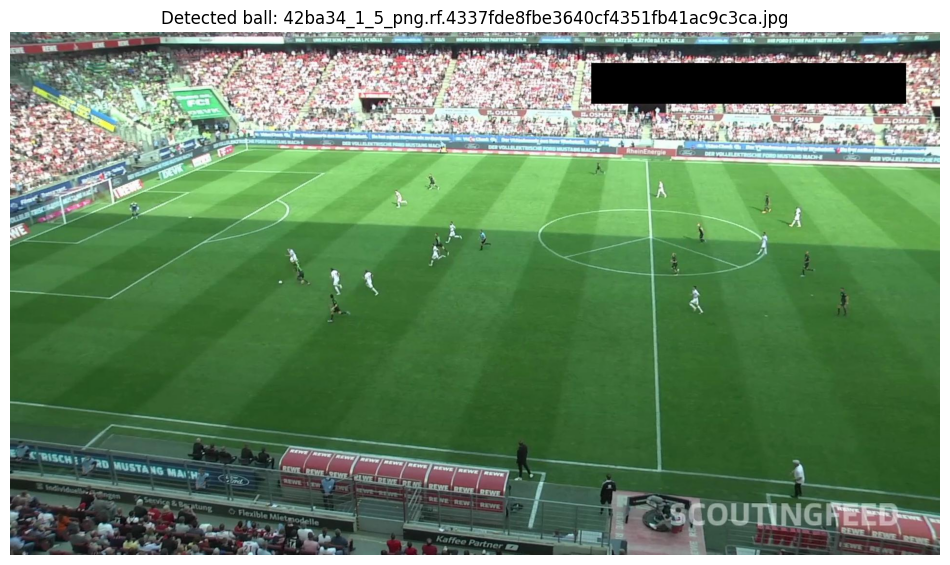

In [15]:
val_results, val_percentages = evaluate_dataset(model, VAL_DIR, class_names)
test_results, test_percentages = evaluate_dataset(model, TEST_DIR, class_names)

In [16]:
def summarize_results(val_percentages, test_percentages):
    print("\n📈 Overall Model Performance Summary")
    print("-" * 40)
    for cls in class_names:
        avg = (val_percentages[cls] + test_percentages[cls]) / 2
        print(f"{cls:12s} | Val: {val_percentages[cls]:6.2f}% | Test: {test_percentages[cls]:6.2f}% | Avg: {avg:6.2f}%")

summarize_results(val_percentages, test_percentages)


📈 Overall Model Performance Summary
----------------------------------------
ball         | Val:  37.14% | Test:  36.36% | Avg:  36.75%
goalkeeper   | Val:  85.19% | Test:  90.91% | Avg:  88.05%
player       | Val:  98.54% | Test:  98.07% | Avg:  98.31%
referee      | Val:  95.51% | Test:  93.10% | Avg:  94.30%
